In [1]:
# python
import sys
import os
import importlib
# columnar analysis
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import processor
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
#fname = '~/local_data/tta_mAlp-0p35GeV_ctau-1e3mm_part-0.root'
samples = [
    #'4mu_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p08mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v1")
# create events collection from single file
fname = fileset[samples[0]][0]
print(fname)
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema,
).events()

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/signals/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_part-0.root


In [3]:
#ak.fields(events)

In [4]:
#/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v3/signals/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_part-0.rootak.fields(events.Muon)

In [5]:
print(events.PV.fields)
print(events.PV.pos.rho)
print(events.PV)
print(events.PV.npvs)

['ndof', 'x', 'y', 'z', 'chi2', 'score', 'npvs', 'npvsGood']
[2.66, 0.682, 3.2, 4.05, 0.967, 1.88, 0.114, ... 5.01, 5.15, 4.57, 1.2, 5.09, 4.03]
[Vertex, Vertex, Vertex, Vertex, Vertex, ... Vertex, Vertex, Vertex, Vertex, Vertex]
[39, 13, 24, 38, 43, 35, 21, 15, 43, 31, ... 10, 30, 19, 21, 19, 22, 29, 30, 35, 21]


In [6]:
print(events.GenPart.fields)
print(events.GenPart.pdgId)
print(ak.num(events.GenPart[abs(events.GenPart.pdgId)==13]))
print(ak.num(events.GenPart[abs(events.GenPart.pdgId)==32]))
print(events.GenPart[abs(events.GenPart.pdgId)==32].children.pdgId)
print(abs(events.GenPart[abs(events.GenPart.pdgId)==32].children.pdgId) == 13)
print(abs(events.GenPart.pdgId))
print(ak.all(abs(events.GenPart[events.GenPart.pdgId==32].children.pdgId) == 13, axis=-1))
print(events.GenPart[(abs(events.GenPart.pdgId)== 32) & ak.all(abs(events.GenPart.children.pdgId) == 13, axis=-1)])

['eta', 'mass', 'phi', 'pt', 'genPartIdxMother', 'pdgId', 'status', 'statusFlags', 'vx', 'vy', 'vz', 'px', 'py', 'pz', 'genPartIdxMotherG', 'distinctParentIdxG', 'childrenIdxG', 'distinctChildrenIdxG', 'distinctChildrenDeepIdxG']
[[-4, 4, 35, 35, 32, 32, -13, 13, -11, ... 11, -413, -4, 411, -411, 433, -421, 431]]
[2, 3, 3, 3, 2, 4, 6, 3, 4, 4, 2, 4, 8, 2, ... 4, 3, 2, 7, 3, 2, 4, 2, 2, 4, 2, 2, 4]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[[[-13, 13], [-11, 11]], [[-13, 13], [-11, ... [-11, 11]], [[-13, 13], [-11, 11]]]
[[[True, True], [False, False]], [[True, ... False]], [[True, True], [False, False]]]
[[4, 4, 35, 35, 32, 32, 13, 13, 11, 11, ... 11, 11, 413, 4, 411, 411, 433, 421, 431]]
[[True, False], [True, False], [True, ... False], [True, False], [True, False]]
[[GenParticle], [GenParticle], [GenParticle, ... [GenParticle], [GenParticle]]


In [7]:
events.Electron.fields

['dEscaleDown',
 'dEscaleUp',
 'dEsigmaDown',
 'dEsigmaUp',
 'deltaEtaSC',
 'dr03EcalRecHitSumEt',
 'dr03HcalDepth1TowerSumEt',
 'dr03TkSumPt',
 'dr03TkSumPtHEEP',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eCorr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'hoe',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'mvaFall17V2Iso',
 'mvaFall17V2noIso',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'phi',
 'pt',
 'r9',
 'scEtOverPt',
 'sieie',
 'sip3d',
 'mvaTTH',
 'charge',
 'cutBased',
 'jetIdx',
 'pdgId',
 'photonIdx',
 'tightCharge',
 'vidNestedWPBitmap',
 'vidNestedWPBitmapHEEP',
 'convVeto',
 'cutBased_HEEP',
 'isPFcand',
 'jetNDauCharged',
 'lostHits',
 'mvaFall17V2Iso_WP80',
 'mvaFall17V2Iso_WP90',
 'mvaFall17V2Iso_WPL',
 'mvaFall17V2noIso_WP80',
 'mvaFall17V2noIso_WP90',
 'mvaFall17V2noIso_WPL',
 'seedGain',
 'genPartIdx',
 'genPartFlav',
 'cleanmask',
 'genPartIdxG',
 'jetIdxG',
 'photonIdxG']

In [8]:
events[ak.num(events.Electron)>0].Electron.vidNestedWPBitmap

<Array [[613550372, 613550372, ... [613566756]] type='81 * var * int32[parameter...'>

In [9]:
events.DSAMuon.fields

['idx',
 'pt',
 'ptErr',
 'eta',
 'etaErr',
 'phi',
 'phiErr',
 'charge',
 'dxy',
 'dz',
 'vx',
 'vy',
 'vz',
 'chi2',
 'ndof',
 'trkNumPlanes',
 'trkNumHits',
 'trkNumDTHits',
 'trkNumCSCHits',
 'normChi2',
 'outerEta',
 'outerPhi',
 'dzPV',
 'dzPVErr',
 'dxyPVTraj',
 'dxyPVTrajErr',
 'dxyPVSigned',
 'dxyPVSignedErr',
 'ip3DPVSigned',
 'ip3DPVSignedErr',
 'dxyBS',
 'dxyBSErr',
 'dzBS',
 'dzBSErr',
 'dxyBSTraj',
 'dxyBSTrajErr',
 'dxyBSSigned',
 'dxyBSSignedErr',
 'ip3DBSSigned',
 'ip3DBSSignedErr',
 'displacedID',
 'muonMatch1',
 'muonMatch1idx',
 'muonMatch2',
 'muonMatch2idx',
 'muonMatch3',
 'muonMatch3idx',
 'muonMatch4',
 'muonMatch4idx',
 'muonMatch5',
 'muonMatch5idx']

In [10]:
events.DSAMuon.muonMatch1

<Array [[4, 3, 0, 0, 0], ... [0, 0, 3, 4]] type='82 * var * float32[parameters={...'>

In [11]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    # maxchunks=1,
)

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        #"barrelE_ID-DPhiIn",
    ],
    ["muon_base", "dsaMuon_base", "lj_base"],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel baseNoLj

Applying cut:  PV filter

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [12]:
hists = out[samples[0]]["hists"]

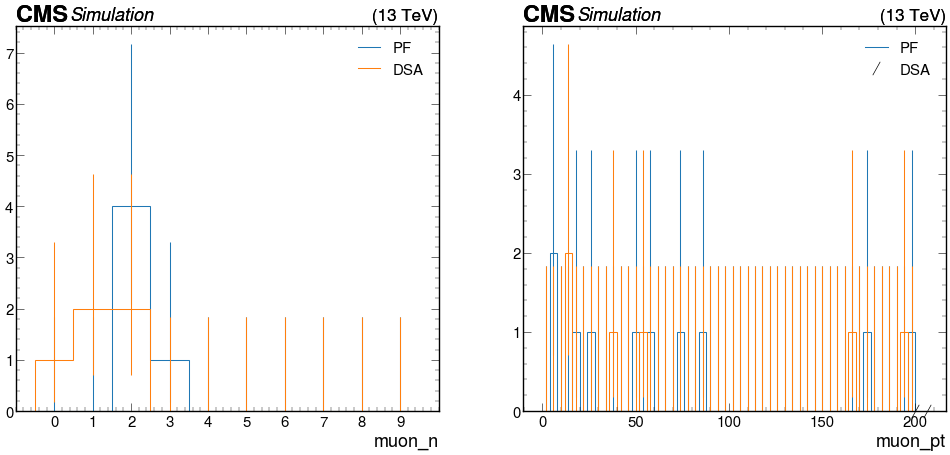

In [13]:
plt.subplots(1, 2, figsize=(24, 10))
plt.subplot(1, 2, 1)
utilities.plot(hists["muon_n"]["baseNoLj", :])
utilities.plot(hists["dsaMuon_n"]["baseNoLj", :])
plt.legend(["PF", "DSA"])
plt.subplot(1, 2, 2)
utilities.plot(hists["muon_pt"]["baseNoLj", ::2j])
utilities.plot(hists["dsaMuon_pt"]["baseNoLj", ::2j])
plt.legend(["PF", "DSA"])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f138ca31af0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

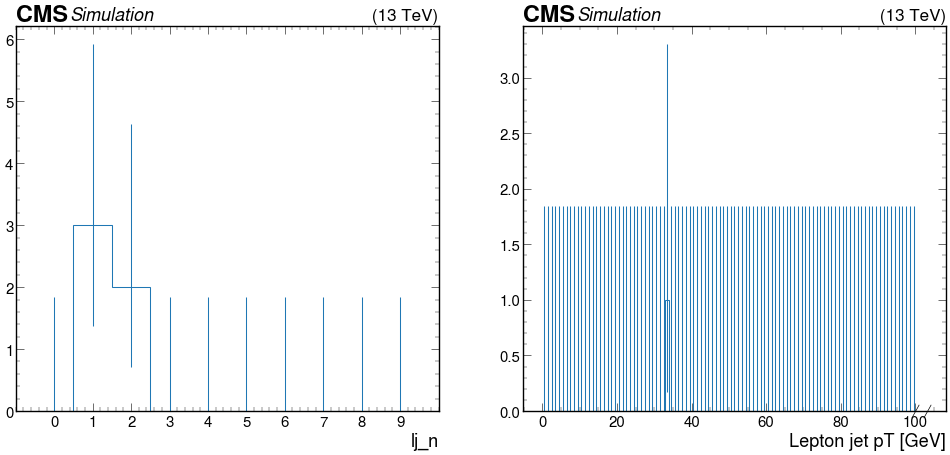

In [14]:
plt.subplots(1, 2, figsize=(24, 10))
plt.subplot(1, 2, 1)
utilities.plot(hists["lj_n"]["baseNoLj", :])
plt.subplot(1, 2, 2)
utilities.plot(hists["lj_pt"]["baseNoLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f13777b6640>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

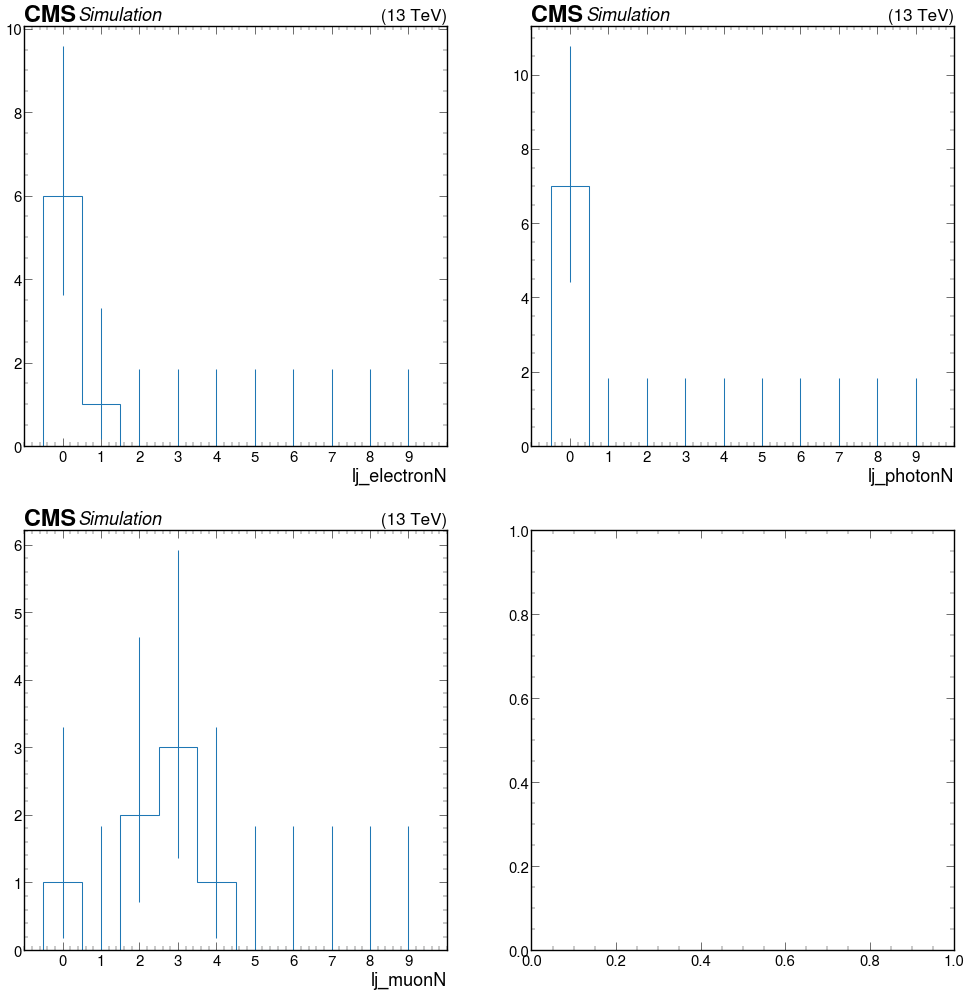

In [15]:
plt.subplots(2, 2, figsize=(24, 24))
plt.subplot(2, 2, 1)
utilities.plot(hists["lj_electronN"]["baseNoLj", :])
plt.subplot(2, 2, 2)
utilities.plot(hists["lj_photonN"]["baseNoLj", :])
plt.subplot(2, 2, 3)
utilities.plot(hists["lj_muonN"]["baseNoLj", :])
#plt.subplot(2, 2, 4)
#utilities.plot(hists["lj_dsaMuonN"]["llpnano", :])